In [2]:
from oct2py import octave
%load_ext oct2py.ipython
%matplotlib inline
import scipy
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
path_data = "d:\data\POETdataset"
pascal_images = os.path.join(path_data, 'PascalImages')

In [4]:
octave.addpath('D:/bin/octave-4.4.1-w64/share/octave/packages/statistics-1.4.0/')
octave.addpath(os.path.join(path_data, 'code'))

'.;D:\\bin\\octave-4.4.1-w64\\share\\octave\\packages\\statistics-1.4.0\\base;D:\\bin\\octave-4.4.1-w64\\share\\octave\\packages\\statistics-1.4.0\\distributions;D:\\bin\\octave-4.4.1-w64\\share\\octave\\packages\\statistics-1.4.0\\models;D:\\bin\\octave-4.4.1-w64\\share\\octave\\packages\\statistics-1.4.0\\tests;D:/bin/octave-4.4.1-w64/share/octave/packages/statistics-1.4.0;D:/bin/Anaconda3/lib/site-packages/oct2py;D:/bin/Anaconda3/lib/site-packages/octave_kernel;D:\\bin\\octave-4.4.1-w64\\lib\\octave\\4.4.1\\site\\oct\\x86_64-w64-mingw32;D:\\bin\\octave-4.4.1-w64\\lib\\octave\\site\\oct\\api-v52\\x86_64-w64-mingw32;D:\\bin\\octave-4.4.1-w64\\lib\\octave\\site\\oct\\x86_64-w64-mingw32;D:\\bin\\octave-4.4.1-w64\\share\\octave\\4.4.1\\site\\m;D:\\bin\\octave-4.4.1-w64\\share\\octave\\site\\api-v52\\m;D:\\bin\\octave-4.4.1-w64\\share\\octave\\site\\m;D:\\bin\\octave-4.4.1-w64\\share\\octave\\site\\m\\once_only;D:\\bin\\octave-4.4.1-w64\\share\\octave\\site\\m\\startup;D:\\bin\\octave-4.4

In [9]:
classname = 'dog'
instances = scipy.io.loadmat(os.path.join(path_data, 'etData', 'etData_%s.mat' %classname))['etData']
set_users = np.array([a for a in range(1,6)])
sigma = 0.5
overlay = True

In [ ]:
for i in instances:
    img_filename = i['filename'][0][0]
    heatmap, img = octave.drawFixationHeatMap(instances, classname, img_filename, pascal_images, set_users, sigma, overlay, nout=2)
    img = img/255
    heatmap_jet = plt.imshow(heatmap, cmap='jet')
    heatmap_jet.write_png('heatmap.png')
    heatmap_jet_ld = scipy.misc.imread('heatmap.png')
    heatmap_jet_ld = heatmap_jet_ld/ 255
    alpha = 0.4

    out_img = np.zeros(img.shape,dtype=img.dtype)
    out_img[:,:,0] = alpha*img[:,:,0] + (1-alpha)* heatmap_jet_ld[:,:,0]
    out_img[:,:,1] = alpha*img[:,:,1] + (1-alpha)* heatmap_jet_ld[:,:,1]
    out_img[:,:,2] = alpha*img[:,:,2] + (1-alpha)* heatmap_jet_ld[:,:,2]

    outimg = plt.imshow(out_img)
    outimg.write_png("%s.png" %img_filename)
    print("writing %s" %img_filename)

D:\bin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


writing 2008_003261
writing 2008_000078
writing 2011_001592


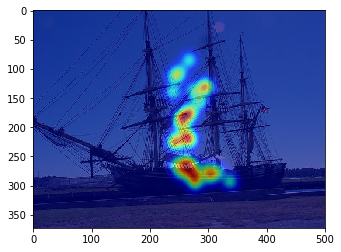

In [12]:
custom = [('aeroplane','2008_003261'), ('dog','2008_000078'), ('boat','2011_001592')]
for i in custom:
    img_filename = i[1]
    classname = i[0]
    instances = scipy.io.loadmat(os.path.join(path_data, 'etData', 'etData_%s.mat' %classname))['etData']
    heatmap, img = octave.drawFixationHeatMap(instances, classname, img_filename, pascal_images, set_users, sigma, overlay, nout=2)
    img = img/255
    heatmap_jet = plt.imshow(heatmap, cmap='jet')
    heatmap_jet.write_png('heatmap.png')
    heatmap_jet_ld = scipy.misc.imread('heatmap.png')
    heatmap_jet_ld = heatmap_jet_ld/ 255
    alpha = 0.4

    out_img = np.zeros(img.shape,dtype=img.dtype)
    out_img[:,:,0] = alpha*img[:,:,0] + (1-alpha)* heatmap_jet_ld[:,:,0]
    out_img[:,:,1] = alpha*img[:,:,1] + (1-alpha)* heatmap_jet_ld[:,:,1]
    out_img[:,:,2] = alpha*img[:,:,2] + (1-alpha)* heatmap_jet_ld[:,:,2]

    outimg = plt.imshow(out_img)
    outimg.write_png("%s.png" %img_filename)
    print("writing %s" %img_filename)